## Optimize the Model

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(['EIN', 'NAME', 'SPECIAL_CONSIDERATIONS'], axis = 1)

In [3]:
application_df.shape

(34299, 9)

In [4]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1


In [5]:
# application_df['INCOME_AMT'].value_counts()

In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
application_types_to_replace = ('T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T15', 'T29', 'T17')

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2170        1
C2561        1
C4500        1
C4200        1
C1728        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x>1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C4100        6
C2400        6
C1720        6
C1600        5
C1257        5
C1260        3
C2710        3
C0           3
C3200        2
C1246        2
C1256        2
C1234        2
C1267        2
Name: CLASSIFICATION, dtype: int64

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = application_df['CLASSIFICATION'].value_counts().loc[lambda x : x < 1883]
classifications_to_replace = pd.DataFrame(classifications_to_replace)
classifications_to_replace = classifications_to_replace.index.to_list()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Results after binning dataframe application_df
application_df.nunique()

APPLICATION_TYPE       9
AFFILIATION            6
CLASSIFICATION         6
USE_CASE               5
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [13]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   APPLICATION_TYPE  34299 non-null  object
 1   AFFILIATION       34299 non-null  object
 2   CLASSIFICATION    34299 non-null  object
 3   USE_CASE          34299 non-null  object
 4   ORGANIZATION      34299 non-null  object
 5   STATUS            34299 non-null  int64 
 6   INCOME_AMT        34299 non-null  object
 7   ASK_AMT           34299 non-null  int64 
 8   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.4+ MB


In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
application_df_with_dummies = pd.get_dummies(application_df, columns=['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT'],drop_first=True, dtype=float)
# application_df_with_dummies = pd.get_dummies(application_df, drop_first=True, dtype=float)

In [15]:
application_df_with_dummies.shape

(34299, 36)

In [16]:
application_df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   STATUS                     34299 non-null  int64  
 1   ASK_AMT                    34299 non-null  int64  
 2   IS_SUCCESSFUL              34299 non-null  int64  
 3   APPLICATION_TYPE_T10       34299 non-null  float64
 4   APPLICATION_TYPE_T19       34299 non-null  float64
 5   APPLICATION_TYPE_T3        34299 non-null  float64
 6   APPLICATION_TYPE_T4        34299 non-null  float64
 7   APPLICATION_TYPE_T5        34299 non-null  float64
 8   APPLICATION_TYPE_T6        34299 non-null  float64
 9   APPLICATION_TYPE_T7        34299 non-null  float64
 10  APPLICATION_TYPE_T8        34299 non-null  float64
 11  AFFILIATION_Family/Parent  34299 non-null  float64
 12  AFFILIATION_Independent    34299 non-null  float64
 13  AFFILIATION_National       34299 non-null  flo

In [17]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = application_df_with_dummies.drop(['IS_SUCCESSFUL'], axis=1)
y = application_df_with_dummies['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
number_of_input_features = len(X_train.columns)
number_of_input_features

35

##  Compile, Train and Evaluate the Model

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=700, activation="relu", input_dim=35))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=700, activation="relu"))
# third hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=700, activation="relu"))
# Fourth hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=700, activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 700)               25200     
_________________________________________________________________
dense_1 (Dense)              (None, 700)               490700    
_________________________________________________________________
dense_2 (Dense)              (None, 700)               490700    
_________________________________________________________________
dense_3 (Dense)              (None, 700)               490700    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 701       
Total params: 1,498,001
Trainable params: 1,498,001
Non-trainable params: 0
_________________________________________________________________


In [21]:
# import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint
# define checkpoint path and filename
os.makedirs("checkpoints_optimization/",exist_ok=True)
checkpoint_path = "checkpoints_optimization/weights.{epoch:02d}.hdf5"

In [22]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000
)

In [24]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, epochs=80, callbacks=[cp_callback])

Epoch 1/80
804/804 [==============================] - 8s 9ms/step - loss: 0.5734 - accuracy: 0.7199
Epoch 2/80
804/804 [==============================] - 7s 9ms/step - loss: 0.5590 - accuracy: 0.7266
Epoch 3/80
804/804 [==============================] - 11s 14ms/step - loss: 0.5558 - accuracy: 0.7284
Epoch 4/80
804/804 [==============================] - 12s 16ms/step - loss: 0.5545 - accuracy: 0.7297
Epoch 5/80
783/804 [============================>.] - ETA: 0s - loss: 0.5517 - accuracy: 0.7306
Epoch 00005: saving model to checkpoints_optimization\weights.05.hdf5
804/804 [==============================] - 14s 17ms/step - loss: 0.5517 - accuracy: 0.7306
Epoch 6/80
804/804 [==============================] - 13s 17ms/step - loss: 0.5511 - accuracy: 0.7312
Epoch 7/80
804/804 [==============================] - 13s 16ms/step - loss: 0.5505 - accuracy: 0.7319
Epoch 8/80
804/804 [==============================] - 13s 16ms/step - loss: 0.5499 - accuracy: 0.7321
Epoch 9/80
804/804 [=============

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5882 - accuracy: 0.7305
Loss: 0.5881685018539429, Accuracy: 0.7304956316947937


<AxesSubplot:>

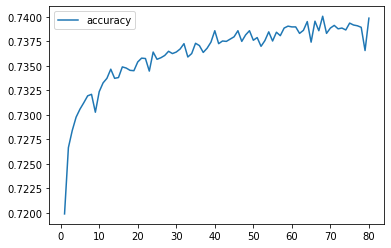

In [26]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))
# Plot the accuracy
history_df.plot(y="accuracy")

In [27]:
# Export our model to HDF5 file
nn.save("Alphabet_Soup_Charity_Optimized.h5")

In [28]:
checkpoint_path

'checkpoints_optimization/weights.{epoch:02d}.hdf5'